# Fateme Fouladi

# Oil Price Forcasting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Section 1

In [3]:
df=pd.read_csv('UNi Tehran boot camp/brent_oil_weekly_30_years.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,04/09/2023,84.46,85.23,85.52,84.11,NaN,-0.78%
1,04/02/2023,85.12,86.00,86.44,83.50,1.29M,6.55%
2,03/26/2023,79.89,74.62,79.95,74.39,1.68M,6.53%
3,03/19/2023,74.99,73.01,77.44,70.12,1.06M,2.77%
4,03/12/2023,72.97,82.60,83.48,71.40,2.13M,-11.85%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1566 non-null   object 
 1   Price     1566 non-null   float64
 2   Open      1566 non-null   float64
 3   High      1566 non-null   float64
 4   Low       1566 non-null   float64
 5   Vol.      1565 non-null   object 
 6   Change %  1566 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.8+ KB


In [5]:
#convert string to date type
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1566 non-null   datetime64[ns]
 1   Price     1566 non-null   float64       
 2   Open      1566 non-null   float64       
 3   High      1566 non-null   float64       
 4   Low       1566 non-null   float64       
 5   Vol.      1565 non-null   object        
 6   Change %  1566 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 85.8+ KB


In [6]:
#convert string to float type
df['Change %'] = pd.to_numeric(df['Change %'].astype(str).str.replace('%', ''))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1566 non-null   datetime64[ns]
 1   Price     1566 non-null   float64       
 2   Open      1566 non-null   float64       
 3   High      1566 non-null   float64       
 4   Low       1566 non-null   float64       
 5   Vol.      1565 non-null   object        
 6   Change %  1566 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 85.8+ KB


In [7]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    return 0.0

df['Vol.'] = df['Vol.'].apply(value_to_float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1566 non-null   datetime64[ns]
 1   Price     1566 non-null   float64       
 2   Open      1566 non-null   float64       
 3   High      1566 non-null   float64       
 4   Low       1566 non-null   float64       
 5   Vol.      1565 non-null   float64       
 6   Change %  1566 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 85.8 KB


In [8]:
#missing values
df.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        1
Change %    0
dtype: int64

In [9]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-04-09,84.46,85.23,85.52,84.11,NaN,-0.78
1,2023-04-02,85.12,86.00,86.44,83.50,1290000.0,6.55
2,2023-03-26,79.89,74.62,79.95,74.39,1680000.0,6.53
3,2023-03-19,74.99,73.01,77.44,70.12,1060000.0,2.77
4,2023-03-12,72.97,82.60,83.48,71.40,2130000.0,-11.85


The Vol. value from last week is not available. so we can use bfill() method to fill missing value.

In [10]:
df['Vol.'] = df['Vol.'].bfill()
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-04-09,84.46,85.23,85.52,84.11,1290000.0,-0.78
1,2023-04-02,85.12,86.00,86.44,83.50,1290000.0,6.55
2,2023-03-26,79.89,74.62,79.95,74.39,1680000.0,6.53
3,2023-03-19,74.99,73.01,77.44,70.12,1060000.0,2.77
4,2023-03-12,72.97,82.60,83.48,71.40,2130000.0,-11.85


Plots

Text(0, 0.5, 'Price')

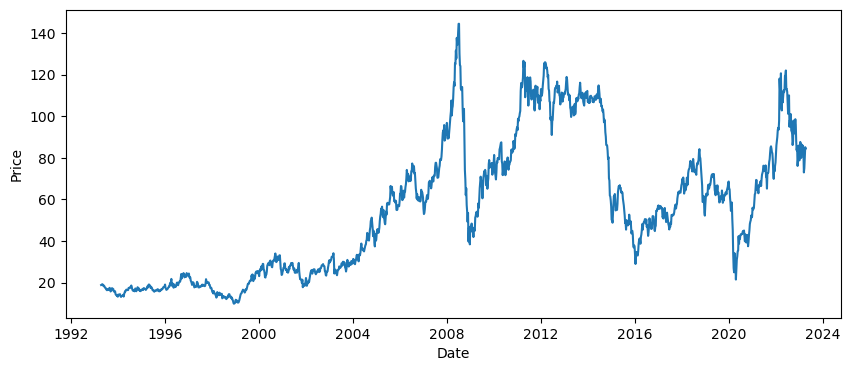

In [11]:
plt.figure(figsize=(10,4))
plt.plot(df['Date'],df['Price'])
plt.xlabel('Date')
plt.ylabel('Price')

Text(0, 0.5, 'Open')

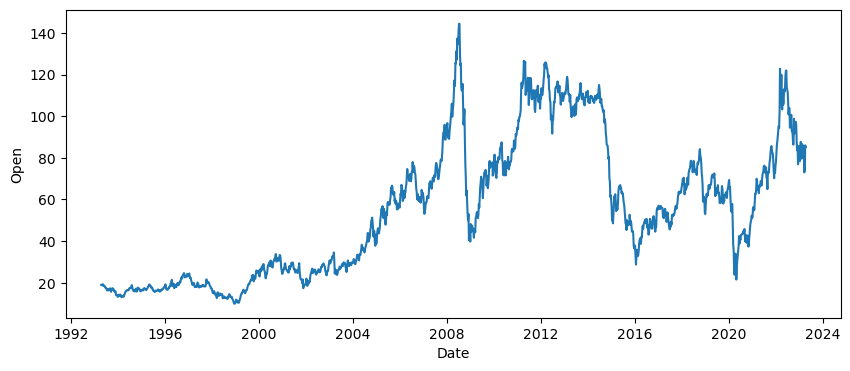

In [12]:
plt.figure(figsize=(10,4))
plt.plot(df['Date'],df['Open'])
plt.xlabel('Date')
plt.ylabel('Open')

Text(0, 0.5, 'High')

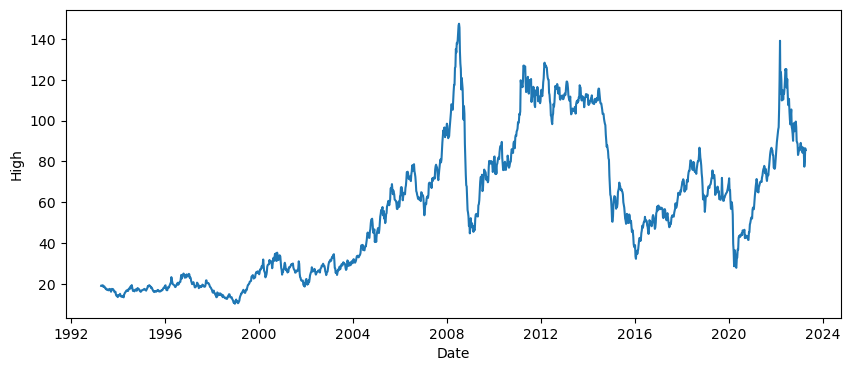

In [13]:
plt.figure(figsize=(10,4))
plt.plot(df['Date'],df['High'])
plt.xlabel('Date')
plt.ylabel('High')

Text(0, 0.5, 'Low')

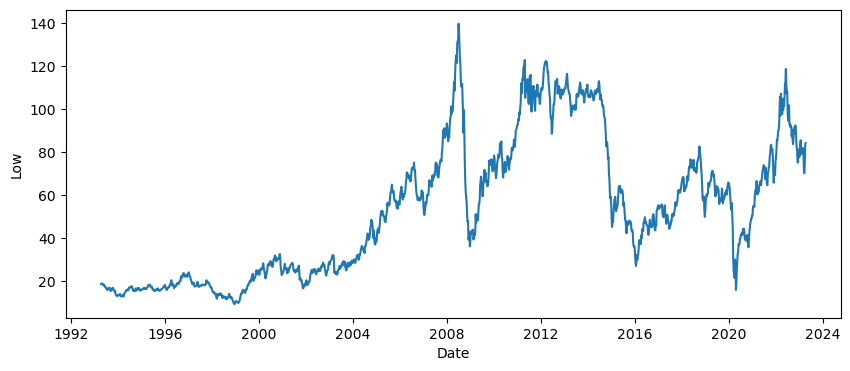

In [14]:
plt.figure(figsize=(10,4))
plt.plot(df['Date'],df['Low'])
plt.xlabel('Date')
plt.ylabel('Low')

Text(0, 0.5, 'Vol.')

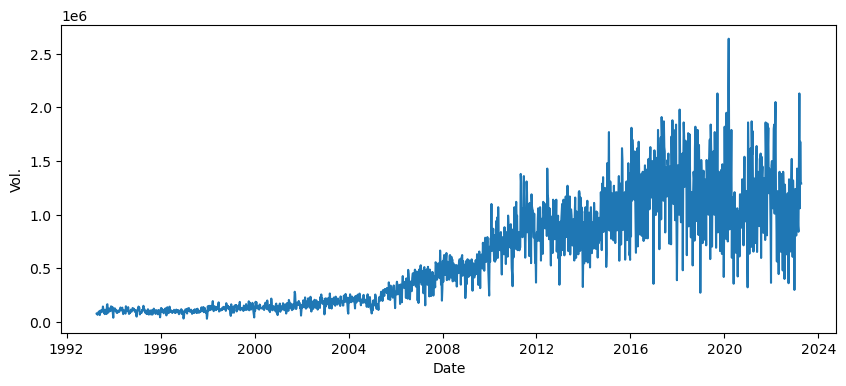

In [15]:
plt.figure(figsize=(10,4))
plt.plot(df['Date'],df['Vol.'])
plt.xlabel('Date')
plt.ylabel('Vol.')

Text(0, 0.5, 'Change %')

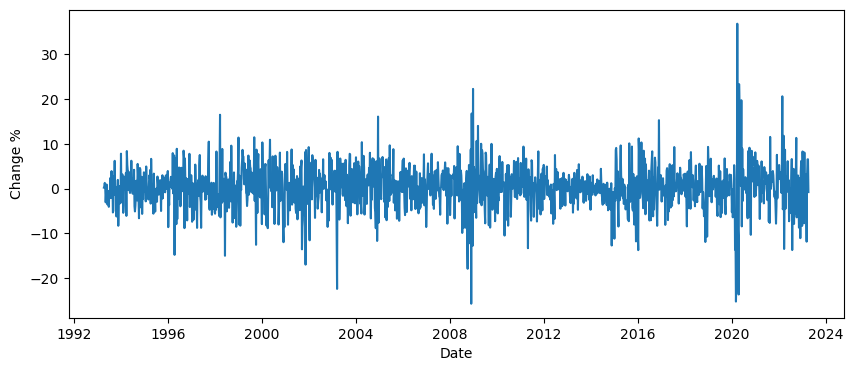

In [16]:
plt.figure(figsize=(10,4))
plt.plot(df['Date'],df['Change %'])
plt.xlabel('Date')
plt.ylabel('Change %')

Section 2

In [17]:
df=df.sort_values(by='Date')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
1565,1993-04-11,18.81,18.98,19.03,18.73,79200.0,0.21
1564,1993-04-18,18.91,18.82,18.98,18.71,77490.0,0.53
1563,1993-04-25,19.15,18.98,19.24,18.72,67360.0,1.27
1562,1993-05-02,19.19,19.25,19.30,18.96,78820.0,0.21
1561,1993-05-09,18.60,19.25,19.27,18.51,89640.0,-3.07


In [18]:
def generate_new_dataframe(df, n, m):
    new_df = pd.DataFrame()

    new_df['Date'] = df['Date']

    #previous n weeks
    for i in range(n,0,-1):
        new_df[f'Price_t-{i}'] = df['Price'].shift(i)
        new_df[f'Open_t-{i}'] = df['Open'].shift(i)
        new_df[f'High_t-{i}'] = df['High'].shift(i)
        new_df[f'Low_t-{i}'] = df['Low'].shift(i)
        new_df[f'Vol._t-{i}'] = df['Vol.'].shift(i)
        new_df[f'Change %_t-{i}'] = df['Change %'].shift(i)
    
    #current week
    new_df[f'Price_t'] = df['Price']
    new_df[f'Open_t'] = df['Open']
    new_df[f'High_t'] = df['High']
    new_df[f'Low_t'] = df['Low']
    new_df[f'Vol._t'] = df['Vol.']
    new_df[f'Change %_t'] = df['Change %']

    #next m weeks
    for i in range(1, m+1):
        new_df[f'Price_t+{i}'] = df['Price'].shift(-i)

    #Drop unnecessary columns

    new_df = new_df.dropna().reset_index(drop=True)
    
    return new_df

In [19]:
generate_new_dataframe(df,8, 1)

,Date,Price_t-8,Open_t-8,High_t-8,Low_t-8,Vol._t-8,Change %_t-8,Price_t-7,Open_t-7,High_t-7,...,Low_t-1,Vol._t-1,Change %_t-1,Price_t,Open_t,High_t,Low_t,Vol._t,Change %_t,Price_t+1
0,1993-06-06,18.81,18.98,19.03,18.73,79200.0,0.21,18.91,18.82,18.98,...,18.26,64370.0,-1.56,17.66,18.33,18.45,17.55,105690.0,-3.55,17.56
1,1993-06-13,18.91,18.82,18.98,18.71,77490.0,0.53,19.15,18.98,19.24,...,17.55,105690.0,-3.55,17.56,17.73,17.84,17.32,105000.0,-0.57,17.45
2,1993-06-20,19.15,18.98,19.24,18.72,67360.0,1.27,19.19,19.25,19.30,...,17.32,105000.0,-0.57,17.45,17.65,17.73,17.33,89880.0,-0.63,16.74
3,1993-06-27,19.19,19.25,19.30,18.96,78820.0,0.21,18.60,19.25,19.27,...,17.33,89880.0,-0.63,16.74,17.60,17.78,16.65,111200.0,-4.07,16.65
4,1993-07-04,18.60,19.25,19.27,18.51,89640.0,-3.07,18.43,18.48,18.53,...,16.65,111200.0,-4.07,16.65,16.80,17.20,16.44,97850.0,-0.54,16.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,2023-03-05,85.28,78.42,85.50,78.42,1240000.0,8.29,87.63,85.36,87.85,...,81.73,840910.0,3.21,82.78,85.83,86.75,80.73,1490000.0,-3.55,72.97
1553,2023-03-12,87.63,85.36,87.85,83.76,1120000.0,2.76,86.66,87.70,89.09,...,80.73,1490000.0,-3.55,72.97,82.60,83.48,71.40,2130000.0,-11.85,74.99
1554,2023-03-19,86.66,87.70,89.09,85.41,805810.0,-1.11,79.94,86.88,87.48,...,71.40,2130000.0,-11.85,74.99,73.01,77.44,70.12,1060000.0,2.77,79.89
1555,2023-03-26,79.94,86.88,87.48,79.62,1040000.0,-7.75,86.39,79.61,86.90,...,70.12,1060000.0,2.77,79.89,74.62,79.95,74.39,1680000.0,6.53,85.12


Section 3, 4, 5

In [20]:
#train test split
new_df=generate_new_dataframe(df,8, 1)
dataset_train = new_df[new_df['Date'] < '2019-01-01']
dataset_test = new_df[new_df['Date'] >= '2019-01-01']
print('train shape:',dataset_train.shape)
print('test shape:',dataset_test.shape)

train shape: (1335, 56)
test shape: (222, 56)


In [21]:
# select price columns
import re
all_columns = dataset_train.columns
price_pattern = r'Price_t-\d+'
price_columns = [column for column in all_columns if re.match(price_pattern, column)]+['Price_t']

X_train = dataset_train[price_columns]
X_test = dataset_test[price_columns]

y_train=dataset_train['Price_t+1']
y_test=dataset_test['Price_t+1']

In [22]:
#normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

LinearRegression

MSE Linear regression: 16.853
MAE Linear regression: 2.907


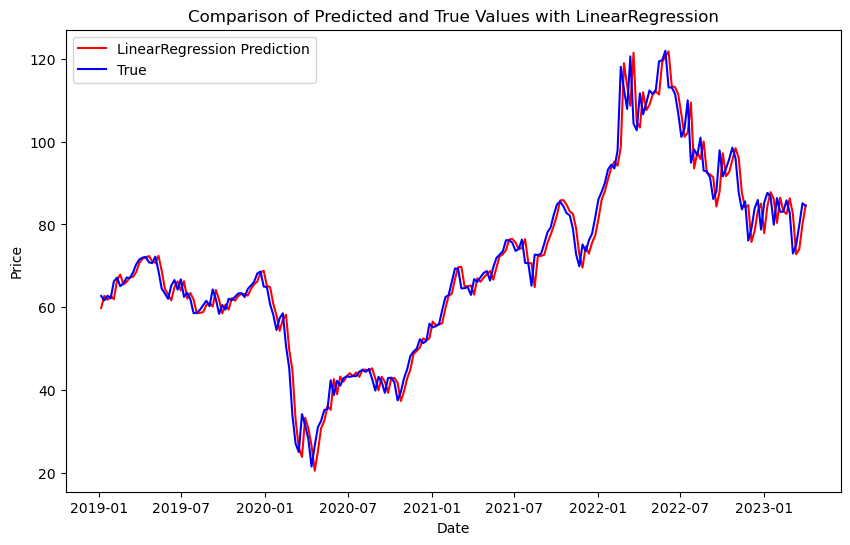

In [23]:
#fitting model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
reg=LinearRegression()
reg.fit(X_train_scale,y_train)
y_pred_reg=reg.predict(X_test_scale)
mse = mean_squared_error(y_test, y_pred_reg)
mae=mean_absolute_error(y_test,y_pred_reg)
print('MSE Linear regression: %.3f' % mse)
print('MAE Linear regression: %.3f' % mae)

#plot
plt.figure(figsize=(10, 6))
plt.plot(dataset_test['Date'], y_pred_reg, color='red', label='LinearRegression Prediction')
plt.plot(dataset_test['Date'], y_test, color='blue', label='True')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Comparison of Predicted and True Values with LinearRegression')
plt.legend()

GradientBoostingRegressor

MSE GradientBoostingRegressor: 18.776
MAE GradientBoostingRegressor: 3.055


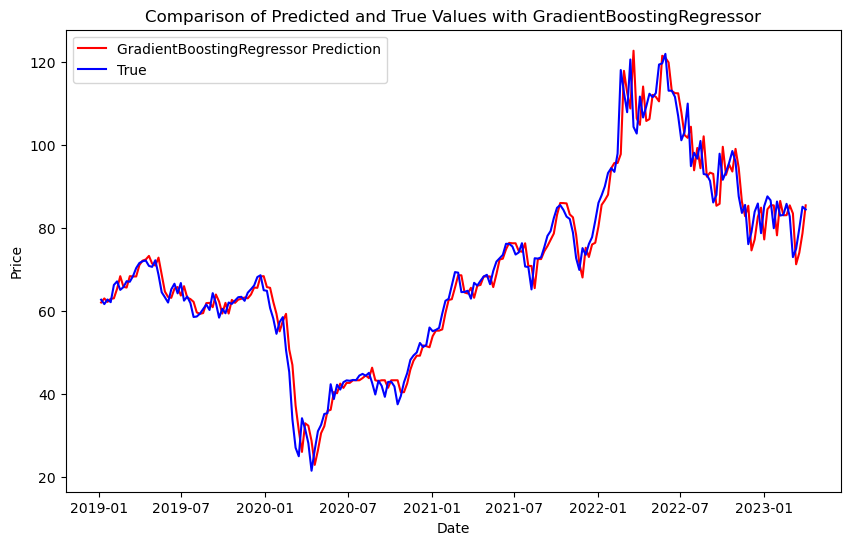

In [24]:
#fitting model
from sklearn.ensemble import GradientBoostingRegressor
gb_reg=GradientBoostingRegressor(random_state=0)
gb_reg.fit(X_train_scale, y_train)
y_pred_gb_reg=gb_reg.predict(X_test_scale)
mse = mean_squared_error(y_test, y_pred_gb_reg)
mae=mean_absolute_error(y_test,y_pred_gb_reg)
print('MSE GradientBoostingRegressor: %.3f' % mse)
print('MAE GradientBoostingRegressor: %.3f' % mae)

#plot
plt.figure(figsize=(10, 6))
plt.plot(dataset_test['Date'], y_pred_gb_reg, color='red', label='GradientBoostingRegressor Prediction')
plt.plot(dataset_test['Date'], y_test, color='blue', label='True')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Comparison of Predicted and True Values with GradientBoostingRegressor')
plt.legend()

In [25]:
#find best values for learning_rate and n_estimators
learning_rate= [0.01, 0.1, 1]
n_estimators=[50,100,500,1000]

for l in learning_rate:
  for e in n_estimators:
    gb_reg=GradientBoostingRegressor(random_state=0,learning_rate=l,n_estimators=e).fit(X_train_scale, y_train)
    y_pred_g=gb_reg.predict(X_test_scale)
    mse = mean_squared_error(y_test, y_pred_g)
    #mae=mean_absolute_error(y_test,y_pred)
    print(f'MSE GradientBoostingRegressor with n_est:{e} and learning rate:{l}:', mse)


MSE GradientBoostingRegressor with n_est:50 and learning rate:0.01: 293.5782154005965
MSE GradientBoostingRegressor with n_est:100 and learning rate:0.01: 117.90875151081107
MSE GradientBoostingRegressor with n_est:500 and learning rate:0.01: 17.746928138183577
MSE GradientBoostingRegressor with n_est:1000 and learning rate:0.01: 18.45627809860693
MSE GradientBoostingRegressor with n_est:50 and learning rate:0.1: 17.699598076269556
MSE GradientBoostingRegressor with n_est:100 and learning rate:0.1: 18.776262846330102
MSE GradientBoostingRegressor with n_est:500 and learning rate:0.1: 21.498488234503608
MSE GradientBoostingRegressor with n_est:1000 and learning rate:0.1: 22.37995783181851
MSE GradientBoostingRegressor with n_est:50 and learning rate:1: 29.719508491427646
MSE GradientBoostingRegressor with n_est:100 and learning rate:1: 30.101248847544298
MSE GradientBoostingRegressor with n_est:500 and learning rate:1: 31.36405915649186
MSE GradientBoostingRegressor with n_est:1000 and 

n_estimator=50 and learning_rate=0.1 works better with MSE: 17.699598076269556

MSE GradientBoostingRegressor with best parameters: 17.700
MAE GradientBoostingRegressor with best parameters: 2.977


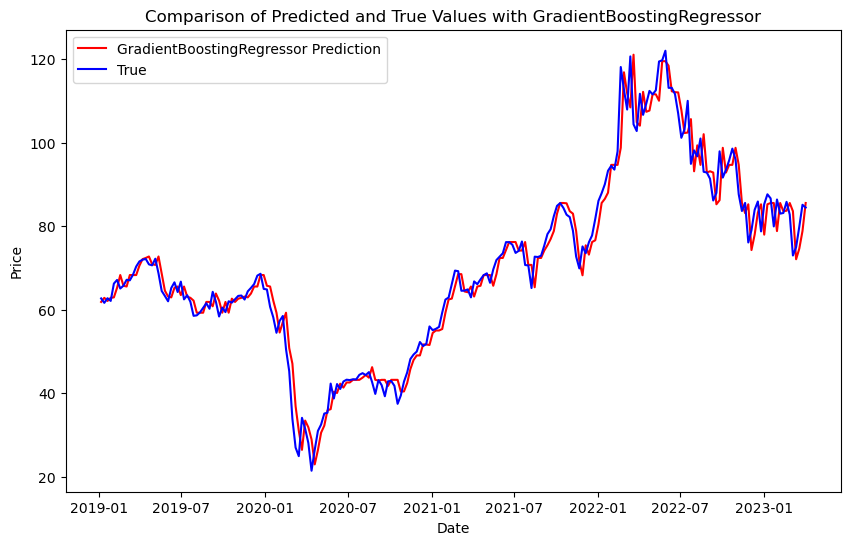

In [26]:
#fitting model with best hyperparameters
from sklearn.ensemble import GradientBoostingRegressor
gb_reg=GradientBoostingRegressor(random_state=0,learning_rate=0.1,n_estimators=50)
gb_reg.fit(X_train_scale, y_train)
y_pred_gb_reg=gb_reg.predict(X_test_scale)
mse = mean_squared_error(y_test, y_pred_gb_reg)
mae=mean_absolute_error(y_test,y_pred_gb_reg)
print('MSE GradientBoostingRegressor with best parameters: %.3f' % mse)
print('MAE GradientBoostingRegressor with best parameters: %.3f' % mae)

#plot
plt.figure(figsize=(10, 6))
plt.plot(dataset_test['Date'], y_pred_gb_reg, color='red', label='GradientBoostingRegressor Prediction')
plt.plot(dataset_test['Date'], y_test, color='blue', label='True')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Comparison of Predicted and True Values with GradientBoostingRegressor')
plt.legend()

Decision Tree Regressor

MSE DecisionTreeRegressor: 30.948
MAE DecisionTreeRegressor: 4.067


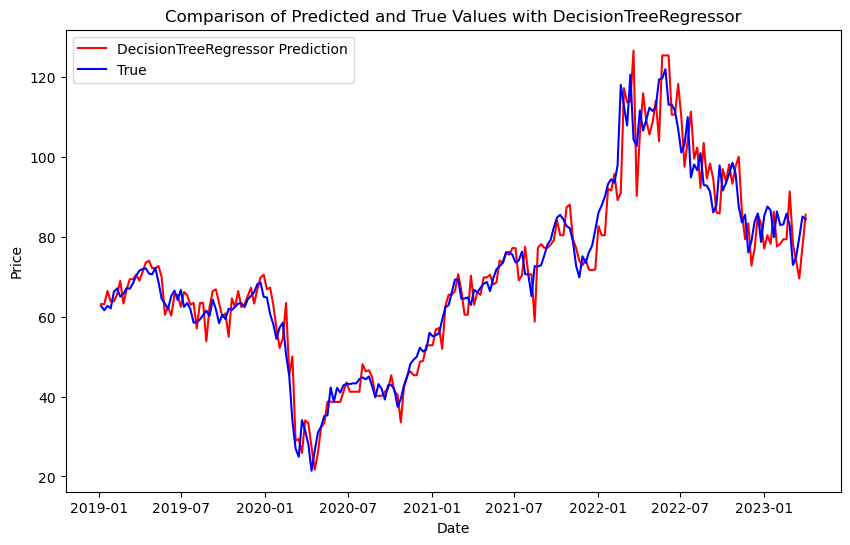

In [27]:
#fitting model
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor(random_state=0)
dt_reg.fit(X_train_scale,y_train)
y_pred_dt_reg=dt_reg.predict(X_test_scale)
mse = mean_squared_error(y_test, y_pred_dt_reg)
mae=mean_absolute_error(y_test,y_pred_dt_reg)
print('MSE DecisionTreeRegressor: %.3f' % mse)
print('MAE DecisionTreeRegressor: %.3f' % mae)

#plot
plt.figure(figsize=(10, 6))
plt.plot(dataset_test['Date'], y_pred_dt_reg, color='red', label='DecisionTreeRegressor Prediction')
plt.plot(dataset_test['Date'], y_test, color='blue', label='True')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Comparison of Predicted and True Values with DecisionTreeRegressor')
plt.legend()

Random Forest Regressor

MSE RandomForestRegressor: 20.245
MAE RandomForestRegressor: 3.155


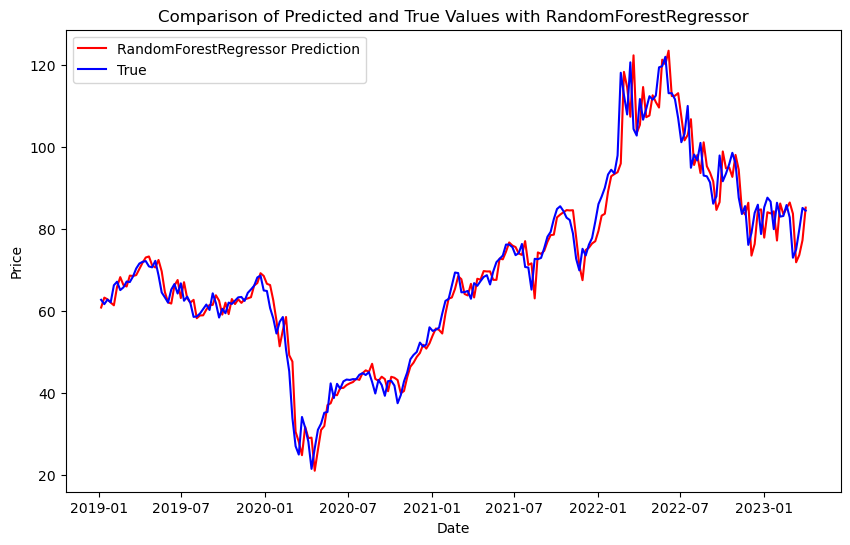

In [28]:
#fitting model
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(random_state=0)
rf_reg.fit(X_train_scale,y_train)
y_pred_rf_reg=rf_reg.predict(X_test_scale)
mse = mean_squared_error(y_test, y_pred_rf_reg)
mae=mean_absolute_error(y_test,y_pred_rf_reg)
print('MSE RandomForestRegressor: %.3f' % mse)
print('MAE RandomForestRegressor: %.3f' % mae)

#plot
plt.figure(figsize=(10, 6))
plt.plot(dataset_test['Date'], y_pred_rf_reg, color='red', label='RandomForestRegressor Prediction')
plt.plot(dataset_test['Date'], y_test, color='blue', label='True')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Comparison of Predicted and True Values with RandomForestRegressor')
plt.legend()

Support Vector Regression

MSE SVR: 28.516
MAE SVR: 3.829


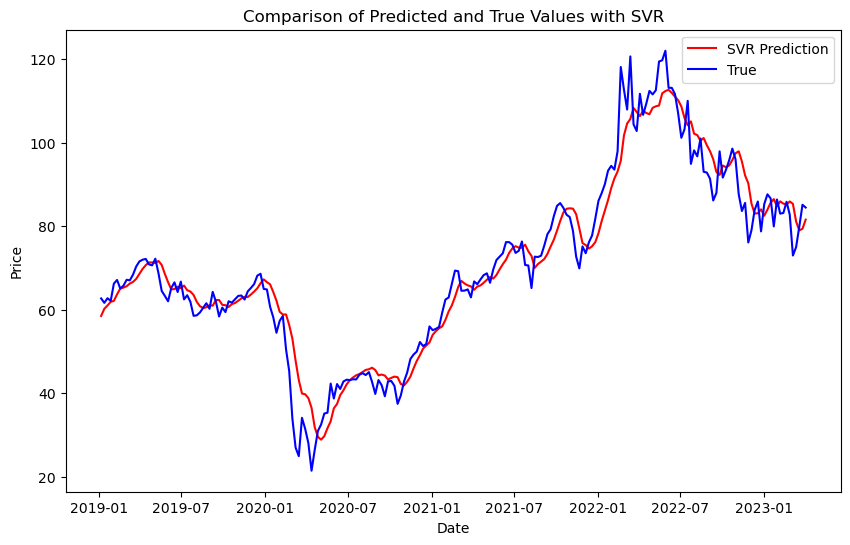

In [29]:
#fitting model
from sklearn.svm import SVR
svr_model=SVR()
svr_model.fit(X_train_scale,y_train)
y_pred_svr=svr_model.predict(X_test_scale)
mse = mean_squared_error(y_test, y_pred_svr)
mae=mean_absolute_error(y_test,y_pred_svr)
print('MSE SVR: %.3f' % mse)
print('MAE SVR: %.3f' % mae)

#plot
plt.figure(figsize=(10, 6))
plt.plot(dataset_test['Date'], y_pred_svr, color='red', label='SVR Prediction')
plt.plot(dataset_test['Date'], y_test, color='blue', label='True')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Comparison of Predicted and True Values with SVR')
plt.legend()

Linear regression works better on our dataset

Section 6

In [30]:
models=[reg, gb_reg, dt_reg, rf_reg, svr_model]
errors=[]
for i in range(3,20):
    new_df=generate_new_dataframe(df,i, 1)
    dataset_train = new_df[new_df['Date'] < '2019-01-01']
    dataset_test = new_df[new_df['Date'] >= '2019-01-01']
    all_columns = dataset_train.columns
    price_pattern = r'Price_t-\d+'
    price_columns = [column for column in all_columns if re.match(price_pattern, column)]+['Price_t']

    X_train = dataset_train[price_columns]
    X_test = dataset_test[price_columns]
    X_train_scale = scaler.fit_transform(X_train)
    X_test_scale = scaler.transform(X_test)
    y_train=dataset_train['Price_t+1']
    y_test=dataset_test['Price_t+1']
    err=[]
    for model in models:
        m=model.fit(X_train_scale,y_train)
        y_pred=model.predict(X_test_scale)
        mse = mean_squared_error(y_test, y_pred)
        #print(f'prediction with last {i} week by {model}| MSE:' , mse)
        err.append(mse)
    errors.append(err)

C:\Users\javad\AppData\Local\Temp\ipykernel_20436\3149217428.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[f'Low_t'] = df['Low']
C:\Users\javad\AppData\Local\Temp\ipykernel_20436\3149217428.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[f'Vol._t'] = df['Vol.']
C:\Users\javad\AppData\Local\Temp\ipykernel_20436\3149217428.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

C:\Users\javad\AppData\Local\Temp\ipykernel_20436\3149217428.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[f'Low_t-{i}'] = df['Low'].shift(i)
C:\Users\javad\AppData\Local\Temp\ipykernel_20436\3149217428.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[f'Vol._t-{i}'] = df['Vol.'].shift(i)
C:\Users\javad\AppData\Local\Temp\ipykernel_20436\3149217428.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

In [31]:
errors_df=pd.DataFrame(errors, columns=list(map(lambda x: str(x), models)), index=list(map(lambda i: f'last{i}week', range(3, 20))))

from IPython.display import display, Markdown
caption = 'MSE for prediction with different n'
display(Markdown(f"**{caption}**"))
display(errors_df)

**MSE for prediction with different n**

,LinearRegression(),"GradientBoostingRegressor(n_estimators=50, random_state=0)",DecisionTreeRegressor(random_state=0),RandomForestRegressor(random_state=0),SVR()
last3week,16.816910,17.627740,24.560105,18.760257,20.727290
last4week,16.766985,17.242932,26.577698,19.036994,22.495432
last5week,16.902071,17.800697,28.807449,20.166351,23.850457
last6week,16.785775,17.922880,29.311573,19.853757,25.490127
last7week,16.742551,17.816380,32.848278,19.353842,26.958090
last8week,16.853030,17.699598,30.948236,20.245013,28.516219
last9week,16.853914,17.646582,31.590036,20.295550,30.167516
last10week,16.971708,17.769854,34.471059,19.987788,31.524012
last11week,16.941673,17.889050,33.258852,19.613741,32.929796
last12week,16.967131,18.046893,30.721048,19.866477,34.136833


In [32]:
print('min MSE for each model:')
errors_df.min()

min MSE for each model:


LinearRegression()                                            16.635265
GradientBoostingRegressor(n_estimators=50, random_state=0)    17.242932
DecisionTreeRegressor(random_state=0)                         24.560105
RandomForestRegressor(random_state=0)                         18.760257
SVR()                                                         20.727290
dtype: float64

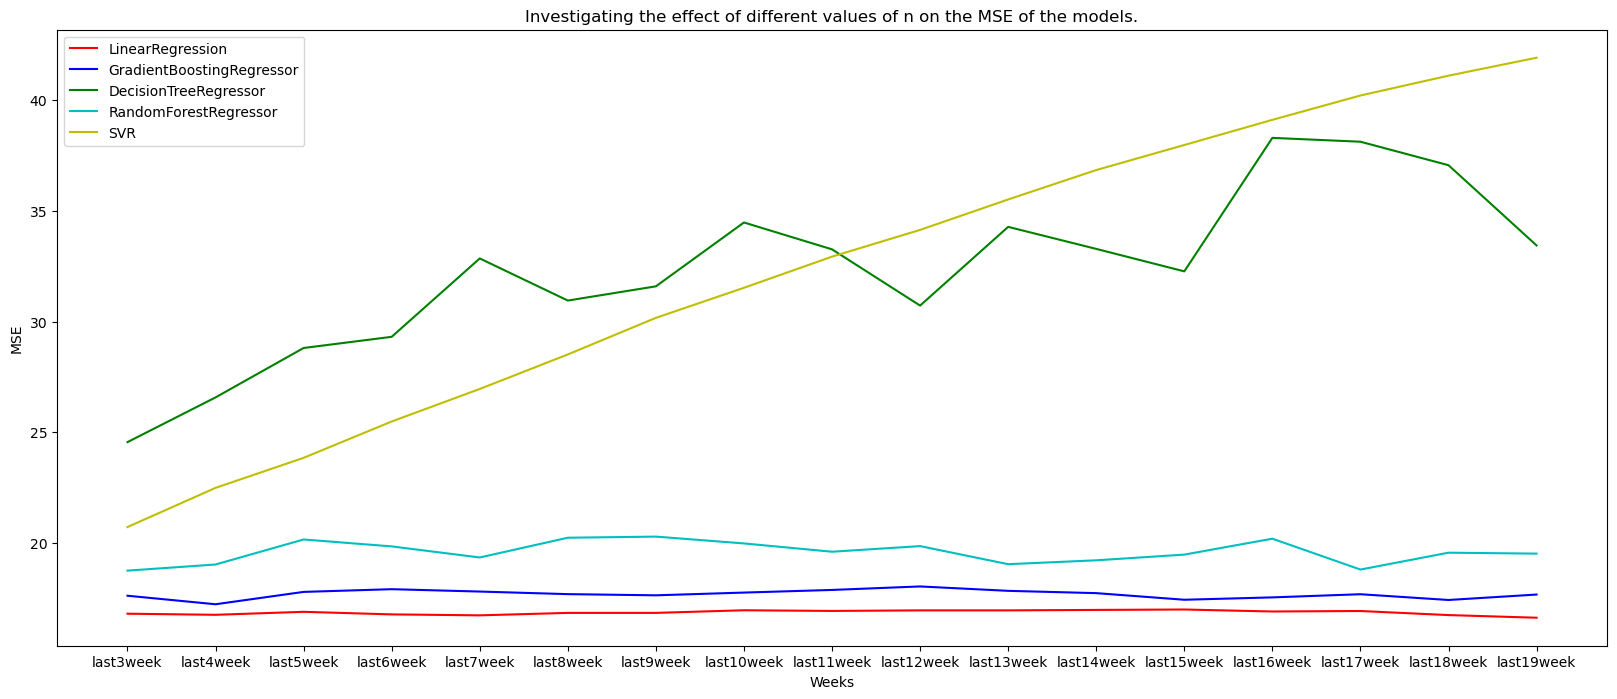

In [33]:
#plot
plt.figure(figsize=(20, 8))
plt.plot((errors_df.index), errors_df['LinearRegression()'], color='r', label='LinearRegression')
plt.plot((errors_df.index), errors_df['GradientBoostingRegressor(n_estimators=50, random_state=0)'], color='b', label='GradientBoostingRegressor')
plt.plot((errors_df.index), errors_df['DecisionTreeRegressor(random_state=0)'], color='g', label='DecisionTreeRegressor')
plt.plot((errors_df.index), errors_df['RandomForestRegressor(random_state=0)'], color='c', label='RandomForestRegressor')
plt.plot((errors_df.index), errors_df['SVR()'], color='y', label='SVR')
plt.xlabel('Weeks')
plt.ylabel('MSE')
plt.title('Investigating the effect of different values of n on the MSE of the models.')
plt.legend()

The number of n didnt make our model much better.

Section 7

In [34]:
#training with all features

models=[reg, gb_reg, dt_reg, rf_reg, svr_model]
errors=[]
new_df=generate_new_dataframe(df,8, 1)
dataset_train = new_df[new_df['Date'] < '2019-01-01']
dataset_test = new_df[new_df['Date'] >= '2019-01-01']
X_train=dataset_train.drop(['Date','Price_t+1'],axis=1)
X_test=dataset_test.drop(['Date','Price_t+1'],axis=1)

X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

y_train=dataset_train['Price_t+1']
y_test=dataset_test['Price_t+1']

for model in models:
    m=model.fit(X_train_scale,y_train)
    y_pred=model.predict(X_test_scale)
    mse = mean_squared_error(y_test, y_pred)
    print(f'MSE by {model}:' , mse)

MSE by LinearRegression(): 17.290132937125026
MSE by GradientBoostingRegressor(n_estimators=50, random_state=0): 16.581338510738405
MSE by DecisionTreeRegressor(random_state=0): 29.89162477477478
MSE by RandomForestRegressor(random_state=0): 18.46050449157658
MSE by SVR(): 117.87217329792927


Predicting using only "price" features is slightly more effective than incorporating additional features, as it allows our model to comprehend the underlying value relationships more accurately, unlike when including "open price," "close price," "high price," and so on.

Section 8

In [35]:
#Forward Selection
new_df=generate_new_dataframe(df,8, 1)
dataset_train = new_df[new_df['Date'] < '2019-01-01']
dataset_test = new_df[new_df['Date'] >= '2019-01-01']
X_train=dataset_train.drop(['Date','Price_t+1'],axis=1)
X_test=dataset_test.drop(['Date','Price_t+1'],axis=1)

from sklearn.feature_selection import SequentialFeatureSelector as SFS
selector = SFS(reg, n_features_to_select=12, direction='forward')
selected_features = selector.fit(X_train, y_train)

selected_feature_indices = selector.get_support(indices=True)
selected_features = X_train.columns[selected_feature_indices]

print('selected features: ',selected_features)

selected features:  Index(['Change %_t-8', 'Vol._t-7', 'Vol._t-6', 'Change %_t-6', 'Vol._t-5',
       'Change %_t-4', 'Change %_t-3', 'Vol._t-2', 'Vol._t-1', 'Change %_t-1',
       'Price_t', 'Low_t'],
      dtype='object')


MSE Linear regression: 17.126
MAE Linear regression: 2.929


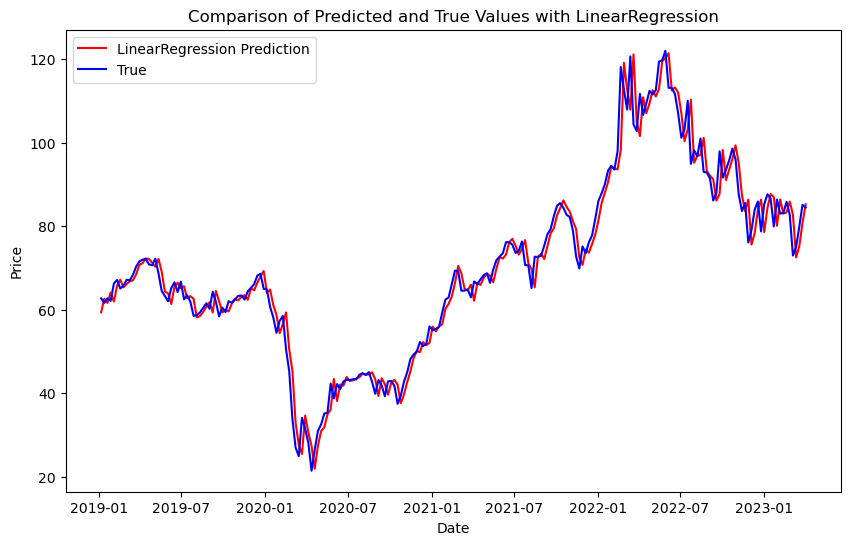

In [36]:
#fitting with best features
new_df=generate_new_dataframe(df,8, 1)
dataset_train = new_df[new_df['Date'] < '2019-01-01']
dataset_test = new_df[new_df['Date'] >= '2019-01-01']

X_train = dataset_train[selected_features]
X_test = dataset_test[selected_features]
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

y_train=dataset_train['Price_t+1']
y_test=dataset_test['Price_t+1']

#fitting model
reg=LinearRegression()
reg.fit(X_train_scale,y_train)
y_pred_reg=reg.predict(X_test_scale)
mse = mean_squared_error(y_test, y_pred_reg)
mae=mean_absolute_error(y_test,y_pred_reg)
print('MSE Linear regression: %.3f' % mse)
print('MAE Linear regression: %.3f' % mae)

#plot
plt.figure(figsize=(10, 6))
plt.plot(dataset_test['Date'], y_pred_reg, color='red', label='LinearRegression Prediction')
plt.plot(dataset_test['Date'], y_test, color='blue', label='True')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Comparison of Predicted and True Values with LinearRegression')
plt.legend()

Section 9

fitting Linear regression with all features and n=12,m=4

MSE Linear regression: 38.187
MAE Linear regression: 4.479


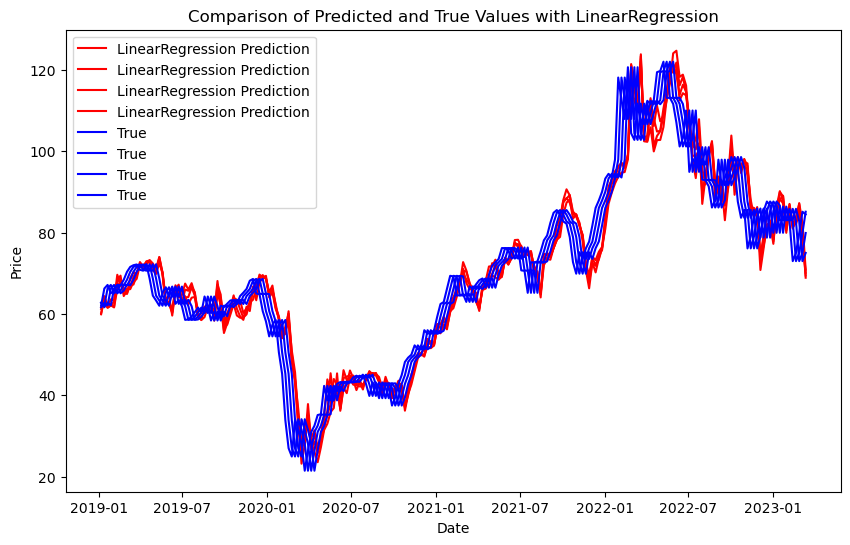

In [37]:
#create dataset
new_df=generate_new_dataframe(df,12, 4)
dataset_train = new_df[new_df['Date'] < '2019-01-01']
dataset_test = new_df[new_df['Date'] >= '2019-01-01']
X_train=dataset_train.drop(['Date','Price_t+1', 'Price_t+2', 'Price_t+3', 'Price_t+4'],axis=1)
X_test=dataset_test.drop(['Date','Price_t+1', 'Price_t+2', 'Price_t+3', 'Price_t+4'],axis=1)
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)
y_train=dataset_train[['Price_t+1', 'Price_t+2', 'Price_t+3', 'Price_t+4']]
y_test=dataset_test[['Price_t+1', 'Price_t+2', 'Price_t+3', 'Price_t+4']]

#fitting models
reg=LinearRegression()
reg.fit(X_train_scale,y_train)
y_pred_reg=reg.predict(X_test_scale)
mse = mean_squared_error(y_test, y_pred_reg)
mae=mean_absolute_error(y_test,y_pred_reg)
print('MSE Linear regression: %.3f' % mse)
print('MAE Linear regression: %.3f' % mae)

#plot
plt.figure(figsize=(10, 6))
plt.plot(dataset_test['Date'], y_pred_reg, color='red', label='LinearRegression Prediction')
plt.plot(dataset_test['Date'], y_test, color='blue', label='True')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Comparison of Predicted and True Values with LinearRegression')
plt.legend()

Gridsearch for RandomForestRegressor with price features

Beforehand, we conducted hyperparameter tuning for the GradientBoostingRegressor.

In [38]:
#create dataset
new_df=generate_new_dataframe(df,12, 4)
dataset_train = new_df[new_df['Date'] < '2019-01-01']
dataset_test = new_df[new_df['Date'] >= '2019-01-01']
X_train=dataset_train.drop(['Date','Price_t+1', 'Price_t+2', 'Price_t+3', 'Price_t+4'],axis=1)
X_test=dataset_test.drop(['Date','Price_t+1', 'Price_t+2', 'Price_t+3', 'Price_t+4'],axis=1)
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)
y_train=dataset_train[['Price_t+1', 'Price_t+2', 'Price_t+3', 'Price_t+4']]
y_test=dataset_test[['Price_t+1', 'Price_t+2', 'Price_t+3', 'Price_t+4']]


#Gridsearch
from sklearn.model_selection import GridSearchCV
rf_reg=RandomForestRegressor()
param_grid={'n_estimators':[10,50,100,500]}
grid_search = GridSearchCV(rf_reg, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scale, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scale)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

#print(f"Model: {model_name}")
print("Best Parameters:", grid_search.best_params_)
print("MSE for RandomForestRegressor:", mse)
print("MAE for RandomForestRegressor:", mae)

Best Parameters: {'n_estimators': 500}
MSE for RandomForestRegressor: 40.88875103252192
MAE for RandomForestRegressor: 4.646028515981739


# Section 10

In conclusion, for our dataset, Linear Regression proves to be the most effective, followed by GradientBoostingRegressor. However, SVR is not recommended.

# Section 11

In [40]:
from PyEMD import EMD

In [41]:
EMD.EMD

PyEMD.EMD.EMD

In [42]:
from PyEMD.EMD import EMD

In [45]:
price = df['Price'].values

emd = EMD()
IMFs = emd(price)

In [46]:
n_imfs = IMFs.shape[0]
price = df['Price'].values[:n_imfs]  # Truncate or pad price data to match the length of IMFs

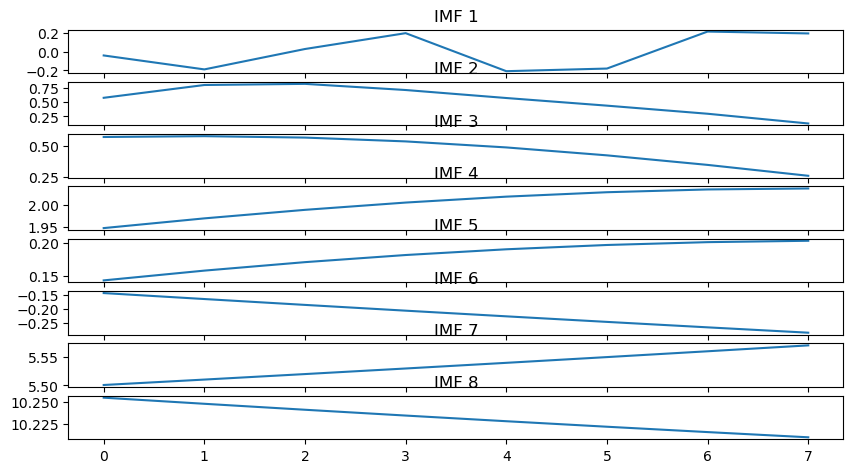

In [49]:
plt.figure(figsize=(10, 6))
for i in range(n_imfs):
    plt.subplot(n_imfs+1, 1, i+1)
    plt.plot(IMFs[i][:len(price)])  # Truncate or pad IMFs to match the length of price data
    plt.title(f'IMF {i+1}')


In [50]:
df['Long_Term_Component'] = IMFs[0]  # Adjust the index based on the desired IMF
df['Medium_Term_Component'] = IMFs[1]  # Adjust the index based on the desired IMF
df['Short_Term_Component'] = IMFs[2]  # Adjust the index based on the desired IMF

In [51]:
df

,Date,Price,Open,High,Low,Vol.,Change %,Long_Term_Component,Medium_Term_Component,Short_Term_Component
1565,1993-04-11,18.81,18.98,19.03,18.73,79200.0,0.21,-0.039706,0.575139,0.572917
1564,1993-04-18,18.91,18.82,18.98,18.71,77490.0,0.53,-0.188543,0.799225,0.579707
1563,1993-04-25,19.15,18.98,19.24,18.72,67360.0,1.27,0.029139,0.819206,0.568105
1562,1993-05-02,19.19,19.25,19.30,18.96,78820.0,0.21,0.198317,0.711504,0.536891
1561,1993-05-09,18.60,19.25,19.27,18.51,89640.0,-3.07,-0.207590,0.571385,0.487711
...,...,...,...,...,...,...,...,...,...,...
4,2023-03-12,72.97,82.60,83.48,71.40,2130000.0,-11.85,-4.429545,-2.072360,-1.035904
3,2023-03-19,74.99,73.01,77.44,70.12,1060000.0,2.77,-2.588594,-0.976858,-1.900005
2,2023-03-26,79.89,74.62,79.95,74.39,1680000.0,6.53,0.948118,0.947217,-2.446366
1,2023-04-02,85.12,86.00,86.44,83.50,1290000.0,6.55,5.068874,2.261521,-2.672472


In [52]:
def new_dataframe12(df, n, m):
    new_df = pd.DataFrame()

    new_df['Date'] = df['Date']
    new_df['Long_Term_Component'] = df['Long_Term_Component']
    new_df['Medium_Term_Component'] = df['Medium_Term_Component']
    new_df['Short_Term_Component'] = df['Short_Term_Component']

    #previous n weeks
    for i in range(n,0,-1):
        new_df[f'Price_t-{i}'] = df['Price'].shift(i)
        new_df[f'Open_t-{i}'] = df['Open'].shift(i)
        new_df[f'High_t-{i}'] = df['High'].shift(i)
        new_df[f'Low_t-{i}'] = df['Low'].shift(i)
        new_df[f'Vol._t-{i}'] = df['Vol.'].shift(i)
        new_df[f'Change %_t-{i}'] = df['Change %'].shift(i)
    
    #current week
    new_df[f'Price_t'] = df['Price']
    new_df[f'Open_t'] = df['Open']
    new_df[f'High_t'] = df['High']
    new_df[f'Low_t'] = df['Low']
    new_df[f'Vol._t'] = df['Vol.']
    new_df[f'Change %_t'] = df['Change %']

    #next m weeks
    for i in range(1, m+1):
        new_df[f'Price_t+{i}'] = df['Price'].shift(-i)

    #Drop unnecessary columns

    new_df = new_df.dropna().reset_index(drop=True)
    
    return new_df

In [53]:
df_12= new_dataframe12(df,1,8)
df_12

,Date,Long_Term_Component,Medium_Term_Component,Short_Term_Component,Price_t-1,Open_t-1,High_t-1,Low_t-1,Vol._t-1,Change %_t-1,...,Vol._t,Change %_t,Price_t+1,Price_t+2,Price_t+3,Price_t+4,Price_t+5,Price_t+6,Price_t+7,Price_t+8
0,1993-04-18,-0.188543,0.799225,0.579707,18.81,18.98,19.03,18.73,79200.0,0.21,...,77490.0,0.53,19.15,19.19,18.60,18.43,18.60,18.31,17.66,17.56
1,1993-04-25,0.029139,0.819206,0.568105,18.91,18.82,18.98,18.71,77490.0,0.53,...,67360.0,1.27,19.19,18.60,18.43,18.60,18.31,17.66,17.56,17.45
2,1993-05-02,0.198317,0.711504,0.536891,19.15,18.98,19.24,18.72,67360.0,1.27,...,78820.0,0.21,18.60,18.43,18.60,18.31,17.66,17.56,17.45,16.74
3,1993-05-09,-0.207590,0.571385,0.487711,19.19,19.25,19.30,18.96,78820.0,0.21,...,89640.0,-3.07,18.43,18.60,18.31,17.66,17.56,17.45,16.74,16.65
4,1993-05-16,-0.179490,0.437769,0.422917,18.60,19.25,19.27,18.51,89640.0,-3.07,...,98050.0,-0.91,18.60,18.31,17.66,17.56,17.45,16.74,16.65,16.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,2023-01-15,3.548010,1.449441,0.034835,85.28,78.42,85.50,78.42,1240000.0,8.29,...,1120000.0,2.76,86.66,79.94,86.39,83.00,83.16,85.83,82.78,72.97
1553,2023-01-22,3.487849,-0.378667,1.395865,87.63,85.36,87.85,83.76,1120000.0,2.76,...,805810.0,-1.11,79.94,86.39,83.00,83.16,85.83,82.78,72.97,74.99
1554,2023-01-29,-2.707821,-1.618997,2.504226,86.66,87.70,89.09,85.41,805810.0,-1.11,...,1040000.0,-7.75,86.39,83.00,83.16,85.83,82.78,72.97,74.99,79.89
1555,2023-02-05,2.532588,-0.628747,3.060846,79.94,86.88,87.48,79.62,1040000.0,-7.75,...,1430000.0,8.07,83.00,83.16,85.83,82.78,72.97,74.99,79.89,85.12


In [54]:
#normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [55]:
#train test split
dataset_train = df_12[df_12['Date'] < '2019-01-01']
dataset_test = df_12[df_12['Date'] >= '2019-01-01']

X_train = dataset_train.drop(['Date','Price_t+1' ], axis=1)
X_test = dataset_test.drop(['Date','Price_t+1' ], axis=1)
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

y_train=dataset_train['Price_t+1']
y_test=dataset_test['Price_t+1']

MSE Linear regression with EMD: 5.492
MAE Linear regression with EMD: 1.578


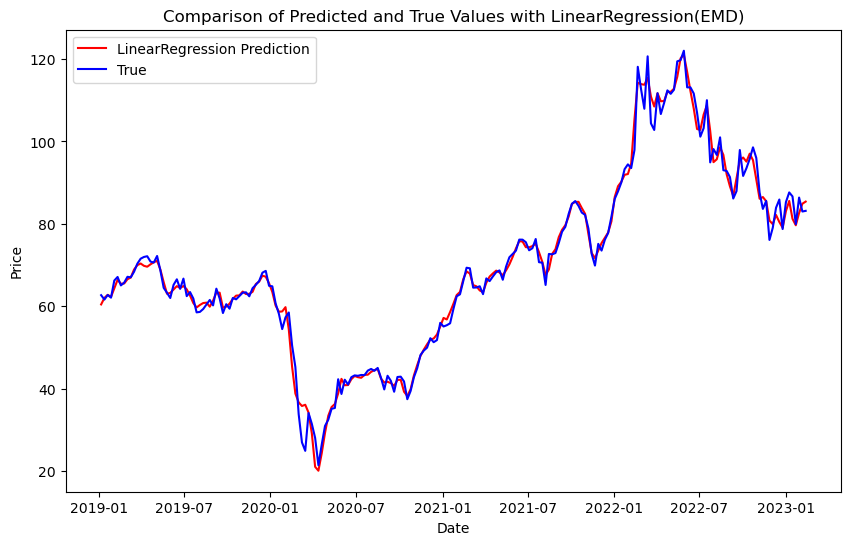

In [56]:
#fitting models
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred_reg_emd=reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_reg_emd)
mae=mean_absolute_error(y_test,y_pred_reg_emd)
print('MSE Linear regression with EMD: %.3f' % mse)
print('MAE Linear regression with EMD: %.3f' % mae)

#plot
plt.figure(figsize=(10, 6))
plt.plot(dataset_test['Date'], y_pred_reg_emd, color='red', label='LinearRegression Prediction')
plt.plot(dataset_test['Date'], y_test, color='blue', label='True')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Comparison of Predicted and True Values with LinearRegression(EMD)')
plt.legend()

# Section 12

Model Stacking

In [57]:
from sklearn.model_selection import cross_val_predict

base_models = [
    LinearRegression(),
    RandomForestRegressor(random_state=0),
    GradientBoostingRegressor(random_state=0),
    SVR()
]

#base models
meta_features_train = np.zeros((X_train.shape[0], len(base_models)))
for i, model in enumerate(base_models):
    model.fit(X_train, y_train)
    meta_features_train[:, i] = cross_val_predict(model, X_train, y_train, cv=5)

#meta model
meta_model = LinearRegression()
meta_model.fit(meta_features_train, y_train)

#base models predictions
meta_features_test = np.zeros((X_test.shape[0], len(base_models)))
for i, model in enumerate(base_models):
    meta_features_test[:, i] = model.predict(X_test)

#meta-model prediction
stacked_predictions = meta_model.predict(meta_features_test)


mse=mean_squared_error(y_test, stacked_predictions)
mae=mean_absolute_error(y_test, stacked_predictions)
print(f"MSE Model Stacking: {mse}")
print(f"MAE Model Stacking: {mae}")


MSE Model Stacking: 5.487748813037869
MAE Model Stacking: 1.595302500991917
